In [71]:
import numpy as np
import matplotlib.pyplot as plt# Violation of RBC_ZBS coefficients, to approach any kind of gemetry, starting with axisymmetric one, by K. Aleynikova, ksenia.aleynikova@ipp.mpg.de, October 2019

In [72]:
import f90nml

In [73]:
vmec_file='input.w7x.1000_1000_1000_1000_+0000_+0000.01.00jh_new.txt'
vmec_params = f90nml.read(vmec_file)['indata']
mpol = vmec_params['mpol']; ntor = vmec_params['ntor']; nfp =vmec_params['nfp'];

convert = lambda line: float(line.split('='.encode('utf-8'))[-1])
f = np.genfromtxt(vmec_file,
                  skip_header=33,skip_footer=1,converters={0:convert,1:convert})
rbc_input=f[:,0]
zbs_input=f[:,1]
RBC = np.concatenate((np.zeros(ntor//2),rbc_input)).reshape((ntor+1,mpol//2+1),order='F')
ZBS = np.concatenate((np.zeros(ntor//2),zbs_input)).reshape((ntor+1,mpol//2+1),order='F')

In [171]:
inter_coeff = 0.5
RBC1 = inter_coeff*RBC
ZBS1 = inter_coeff*ZBS
RBC1[6,:2] = RBC[6,:2]
#ZBS1[6,:2] = [0,0.489000]
ZBS1[6,:2] = ZBS[6,:2]

In [172]:
for row in RBC1: 
    for item in row:
        print('%3f ' % item, end="") 
    print()

0.000000 -0.000254 0.000224 -0.000078 0.000058 -0.000051 0.000026 
0.000000 0.000057 -0.000143 0.000043 -0.000054 -0.000041 -0.000012 
0.000000 -0.000373 0.000050 0.000100 0.000000 0.000082 -0.000014 
0.000000 -0.000045 0.000155 -0.000050 0.000105 -0.000027 0.000028 
0.000000 0.000778 0.001184 -0.000046 0.000044 -0.000049 0.000040 
0.000000 0.011865 0.005567 0.000584 -0.000212 0.000285 -0.000022 
5.521000 0.489000 0.018536 -0.001078 0.001143 0.000278 0.000036 
0.139245 -0.105725 0.022090 -0.005822 -0.000088 0.000858 -0.000643 
-0.003565 -0.009300 0.033918 -0.010545 0.004345 -0.000357 -0.000779 
0.000086 0.000915 -0.000672 -0.006697 0.001639 -0.000582 -0.000674 
-0.000732 0.000622 -0.000384 0.000647 0.000248 0.000511 -0.000421 
-0.000046 0.000136 -0.000049 0.000061 -0.000340 0.000078 -0.000310 
-0.000158 0.000002 -0.000002 0.000055 -0.000004 0.000046 0.000063 


In [173]:
for row in ZBS1: 
    for item in row: 
        print('%3f ' % item, end="") 
    print()

0.000000 0.000369 -0.000302 0.000116 -0.000037 -0.000046 0.000011 
0.000000 0.000000 0.000110 -0.000019 0.000015 0.000102 -0.000030 
0.000000 0.000082 0.000094 -0.000119 0.000048 -0.000046 0.000005 
0.000000 0.000767 -0.000034 -0.000012 -0.000068 0.000016 0.000050 
0.000000 0.003786 -0.000015 0.000328 0.000016 -0.000032 -0.000020 
0.000000 0.010295 0.003942 -0.000289 0.000023 0.000211 0.000001 
0.000000 0.624960 -0.001925 -0.000805 0.000657 0.000443 -0.000056 
-0.117520 0.104845 0.009964 -0.002601 0.000546 0.000232 -0.000297 
0.001299 0.006887 -0.025206 0.003631 0.004386 -0.001313 -0.000561 
0.000866 -0.000846 0.001258 0.005557 -0.002392 -0.000273 -0.000503 
0.000915 -0.000409 0.000483 -0.000438 -0.000762 0.000572 -0.000273 
0.000114 -0.000127 0.000129 -0.000029 0.000244 0.000009 0.000052 
0.000067 0.000051 0.000006 -0.000016 -0.000002 -0.000064 0.000024 


In [174]:
m_span = np.arange(mpol/2+1)
n_span = np.arange(ntor+1)-ntor/2
R_vmec = np.vectorize(lambda theta,phi: np.sum(RBC*np.cos(m_span[None,:] * theta - n_span[:,None] * phi * nfp)))
Z_vmec = np.vectorize(lambda theta,phi: np.sum(ZBS*np.sin(m_span[None,:] * theta - n_span[:,None] * phi * nfp)))

In [175]:
R_vmec1 = np.vectorize(lambda theta,phi: np.sum(RBC1*np.cos(m_span[None,:] * theta - n_span[:,None] * phi * nfp)))
Z_vmec1 = np.vectorize(lambda theta,phi: np.sum(ZBS1*np.sin(m_span[None,:] * theta - n_span[:,None] * phi * nfp)))

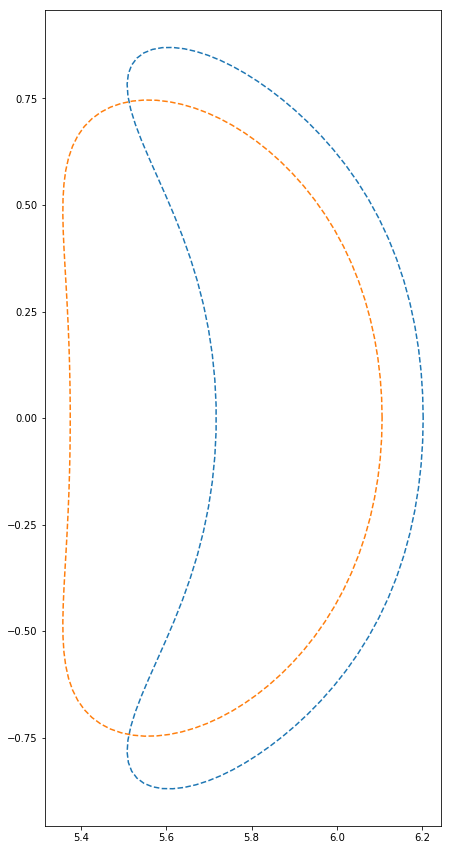

In [176]:
#%matplotlib inline
theta = np.linspace(0,2.*np.pi,100)
phi   = np.linspace(0,2.*np.pi/10,100)
#theta = np.linspace(0,2.*np.pi,100)
#phi   = np.linspace(0,2.*np.pi,100)
fig, ax = plt.subplots(figsize=(10,15))

#ax.plot(R_vmec(theta,2.*np.pi/5),Z_vmec(theta,2.*np.pi/5),'--')
#ax.plot(R_vmec1(theta,2.*np.pi/5),Z_vmec1(theta,2.*np.pi/5),'--')
ax.plot(R_vmec(theta,2.*np.pi),Z_vmec(theta,2.*np.pi),'--')
ax.plot(R_vmec1(theta,2.*np.pi),Z_vmec1(theta,2.*np.pi),'--')

ax.set_aspect('equal')

In [160]:
T, P = np.meshgrid(theta, phi)
x = R_vmec(T,P)*np.cos(P)
y = R_vmec(T,P)*np.sin(P)
z = Z_vmec(T,P)

x1 = R_vmec1(T,P)*np.cos(P)
y1 = R_vmec1(T,P)*np.sin(P)
z1 = Z_vmec1(T,P)

import ipyvolume as ipv
ipv.figure(height=800, width=800)
obj = ipv.plot_surface(x, y, z,color='blue')
obj1 = ipv.plot_surface(x1, y1, z1)

#ipv.xlim(extent[0][0], extent[0][1])
#ipv.ylim(extent[1][0], extent[1][1])
#ipv.zlim(extent[2][0], extent[2][1])
ipv.squarelim()
ipv.show()